In [2]:
# Data source: https://ffiec.cfpb.gov/data-browser/data/2024?category=states
# Data fields: https://ffiec.cfpb.gov/documentation/publications/loan-level-datasets/lar-data-fields

## Part 1: Data Cleaning and Handling Inconsistencies

In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv('state_NY.csv', dtype=str)

In [4]:
print(df.shape)

(383577, 99)


In [5]:
df = df.drop(['activity_year', 'lei', 'derived_msa-md', 'state_code', 'census_tract', 'total_loan_costs', 
              'total_points_and_fees','origination_charges', 'discount_points', 'lender_credits', 
              'prepayment_penalty_term', 'intro_rate_period', 'multifamily_affordable_units', 
              'applicant_credit_score_type', 'co-applicant_credit_score_type', 'submission_of_application',
              'initially_payable_to_institution', 'hoepa_status', 'manufactured_home_secured_property_type', 
              'manufactured_home_land_property_interest'], axis=1)

In [6]:
print(df.shape)

(383577, 79)


In [7]:
df = df[~df['derived_ethnicity'].isin(['Ethnicity Not Available'])]
print("After cleaning derived_ethnicity")
print(df.shape)

df = df[~df['derived_race'].isin(['Race Not Available'])]
print("After cleaning derived_race")
print(df.shape)

df = df[~df['derived_sex'].isin(['Sex Not Available'])]
print("After cleaning derived_sex")
print(df.shape)

df = df[~df['loan_purpose'].astype(str).isin(['5'])]
print("After cleaning loan_purpose")
print(df.shape)

df = df[~df['applicant_age'].astype(str).isin(['8888'])]
print("After cleaning applicant_age")
print(df.shape)

df = df[~df['co-applicant_age'].astype(str).isin(['8888'])]
print("After cleaning co-applicant_age")
print(df.shape)

After cleaning derived_ethnicity
(300539, 79)
After cleaning derived_race
(286487, 79)
After cleaning derived_sex
(285610, 79)
After cleaning loan_purpose
(285592, 79)
After cleaning applicant_age
(283286, 79)
After cleaning co-applicant_age
(283026, 79)


In [8]:
columns_require_1111_cleaning = ['reverse_mortgage', 'open-end_line_of_credit', 'business_or_commercial_purpose']
columns_require_1111_cleaning.extend([f'aus-{i}' for i in range(1, 6)])
columns_require_1111_cleaning.extend([f'denial_reason-{i}' for i in range(1, 5)])
for col in columns_require_1111_cleaning:
    df = df[~df[col].astype(str).isin(['1111'])]
print(df.shape)

(275232, 79)


In [9]:
columns_require_exempt_cleaning = ['loan_to_value_ratio', 'interest_rate', 'rate_spread', 'loan_term', 
                                   'property_value', 'debt_to_income_ratio']
for col in columns_require_exempt_cleaning:
    df = df[~df[col].astype(str).isin(['Exempt'])]
print(df.shape)

(275232, 79)


In [10]:
# source: https://en.wikipedia.org/wiki/List_of_counties_in_New_York

df['county_code'] = df['county_code'].astype(str).map({
    "36001": "Albany",
    "36003": "Allegany",
    "36005": "Bronx",
    "36007": "Broome",
    "36009": "Cattaraugus",
    "36011": "Cayuga",
    "36013": "Chautauqua",
    "36015": "Chemung",
    "36017": "Chenango",
    "36019": "Clinton",
    "36021": "Columbia",
    "36023": "Cortland",
    "36025": "Delaware",
    "36027": "Dutchess",
    "36029": "Erie",
    "36031": "Essex",
    "36033": "Franklin",
    "36035": "Fulton",
    "36037": "Genesee",
    "36039": "Greene",
    "36041": "Hamilton",
    "36043": "Herkimer",
    "36045": "Jefferson",
    "36047": "Kings",
    "36049": "Lewis",
    "36051": "Livingston",
    "36053": "Madison",
    "36055": "Monroe",
    "36057": "Montgomery",
    "36059": "Nassau",
    "36061": "New_York",
    "36063": "Niagara",
    "36065": "Oneida",
    "36067": "Onondaga",
    "36069": "Ontario",
    "36071": "Orange",
    "36073": "Orleans",
    "36075": "Oswego",
    "36077": "Otsego",
    "36079": "Putnam",
    "36081": "Queens",
    "36083": "Rensselaer",
    "36085": "Richmond",
    "36087": "Rockland",
    "36089": "St_Lawrence",
    "36091": "Saratoga",
    "36093": "Schenectady",
    "36095": "Schoharie",
    "36097": "Schuyler",
    "36099": "Seneca",
    "36101": "Steuben",
    "36103": "Suffolk",
    "36105": "Sullivan",
    "36107": "Tioga",
    "36109": "Tompkins",
    "36111": "Ulster",
    "36113": "Warren",
    "36115": "Washington",
    "36117": "Wayne",
    "36119": "Westchester",
    "36121": "Wyoming",
    "36123": "Yates"
})

In [11]:
df['conforming_loan_limit'] = df['conforming_loan_limit'].map({
    "C": "Conforming",
    "NC": "Nonconforming",
    "U": "Undetermined"
})

In [12]:
df['action_taken'] = df['action_taken'].astype(str).map({
    "1": "Loan_originated",
    "2": "Application_approved_but_not_accepted",
    "3": "Application_denied",
    "4": "Application_withdrawn_by_applicant",
    "5": "File_closed_for_incompleteness",
    "6": "Purchased_loan",
    "7": "Preapproval_request_denied",
    "8": "Preapproval_request_approved_but_not_accepted"
})

In [13]:
df['purchaser_type'] = df['purchaser_type'].astype(str).map({
    "0": "Not_applicable",
    "1": "Fannie_Mae",
    "2": "Ginnie_Mae",
    "3": "Freddie_Mac",
    "4": "Farmer_Mac",
    "5": "Private_securitizer",
    "6": "Commercial_bank_or_savings_bank_or_savings_association",
    "71": "Credit_union_or_mortgage_company_or_finance_company",
    "72": "Life_insurance_company",
    "8": "Affiliate_institution",
    "9": "Other_type_of_purchaser"
})

In [14]:
df['loan_type'] = df['loan_type'].astype(str).map({
    "1": "Conventional",
    "2": "FHA_insured",
    "3": "VA_guaranteed",
    "4": "RHS_or_FSA_guaranteed"
})

In [15]:
df['occupancy_type'] = df['occupancy_type'].astype(str).map({
    "1": "Principal_residence",
    "2": "Second_residence",
    "3": "Investment_property"
})

In [16]:
df['applicant_sex'] = df['applicant_sex'].astype(str).map({
    "1": "Male",
    "2": "Female",
    "3": "Not_provided",
    "4": "Not_applicable",
    "6": "Both_selected"
})

df['co-applicant_sex'] = df['co-applicant_sex'].astype(str).map({
    "1": "Male",
    "2": "Female",
    "3": "Not_provided",
    "4": "Not_applicable",
    "5": "No_co-applicant",
    "6": "Both_selected"
})

In [17]:
df['applicant_ethnicity_observed'] = df['applicant_ethnicity_observed'].astype(str).map({
    "1": True,
    "2": False,
    "3": np.nan
})

df['co-applicant_ethnicity_observed'] = df['co-applicant_ethnicity_observed'].astype(str).map({
    "1": True,
    "2": False,
    "3": np.nan,
    "4": "no_co-applicant"
})

df['applicant_race_observed'] = df['applicant_race_observed'].astype(str).map({
    "1": True,
    "2": False,
    "3": np.nan
})

df['co-applicant_race_observed'] = df['co-applicant_race_observed'].astype(str).map({
    "1": True,
    "2": False,
    "3": np.nan,
    "4": "no_co-applicant"
})

df['applicant_sex_observed'] = df['applicant_sex_observed'].astype(str).map({
    "1": True,
    "2": False,
    "3": np.nan
})

df['co-applicant_sex_observed'] = df['co-applicant_sex_observed'].astype(str).map({
    "1": True,
    "2": False,
    "3": np.nan,
    "4": "no_co-applicant"
})

In [18]:
def convert_to_boolean_and_drop(df, conversions_list):
    for new_col, original_col, value_for_true in conversions_list:
        df[new_col] = (df[original_col].astype(str) == value_for_true)
        df = df.drop(original_col, axis=1)
    return df

boolean_conversions = [
    ('preapproval_requested', 'preapproval', '1'),
    ('secured_by_a_first_lien', 'lien_status', '1'),
    ('is_reverse_mortgage', 'reverse_mortgage', '1'),
    ('is_open-end_line_of_credit', 'open-end_line_of_credit', '1'),
    ('primarily_for_a_business_or_commercial_purpose', 'business_or_commercial_purpose', '1'),
    ('includes_negative_amortization', 'negative_amortization', '1'),
    ('includes_interest_only_payment', 'interest_only_payment', '1'),
    ('includes_balloon_payment', 'balloon_payment', '1'),
    ('includes_other_nonamortizing_features', 'other_nonamortizing_features', '1'),
    ('is_site_built', 'construction_method', '1')
]
df = convert_to_boolean_and_drop(df, boolean_conversions)
print(df.shape)

(275232, 79)


In [19]:
columns_require_regex_cleaning = ['derived_loan_product_type', 'derived_dwelling_category', 'derived_ethnicity', 
                                  'derived_race', 'derived_sex']
for col in columns_require_regex_cleaning:
    df[col] = df[col].str.replace(r'[^a-zA-Z0-9\-_]', '_', regex=True)

In [20]:
df['total_units'] = df['total_units'].replace({">149": "over_149"})

In [21]:
df['debt_to_income_ratio'] = df['debt_to_income_ratio'].replace({'>60%': 'over_60_percent', '<20%': "below_20_percent"})
df['debt_to_income_ratio'] = df['debt_to_income_ratio'].replace(r'%', '_percent', regex=True)

In [22]:
df['applicant_age'] = df['applicant_age'].replace({'<25': 'below_25', '>74': "above_74"})
df['co-applicant_age'] = df['co-applicant_age'].replace({'<25': 'below_25', '>74': "above_74"})

In [23]:
ethnicity_map = {
    '1': 'Hispanic_or_Latino',
    '11': 'Mexican',
    '12': 'Puerto_Rican',
    '13': 'Cuban',
    '14': 'Other_Hispanic_or_Latino',
    '2': 'Not_Hispanic_or_Latino',
    '3': 'Not_provided',
    '4': 'Not_applicable',
    '5': "No_co-applicant"
}

applicant_ethnicity_cols = [f'applicant_ethnicity-{i}' for i in range(1, 6)]

df[applicant_ethnicity_cols] = df[applicant_ethnicity_cols].astype(str)

for code, category in ethnicity_map.items():
    col_name = f'applicant_ethnicity_is_{category}'
    df[col_name] = df[applicant_ethnicity_cols].isin([code]).any(axis=1)

df = df.drop(applicant_ethnicity_cols, axis=1)

co_applicant_ethnicity_cols = [f'co-applicant_ethnicity-{i}' for i in range(1, 6)]

df[co_applicant_ethnicity_cols] = df[co_applicant_ethnicity_cols].astype(str)

for code, category in ethnicity_map.items():
    col_name = f'co-applicant_ethnicity_is_{category}'
    df[col_name] = df[co_applicant_ethnicity_cols].isin([code]).any(axis=1)

df = df.drop(co_applicant_ethnicity_cols, axis=1)
print(df.shape)

(275232, 87)


In [24]:
race_map = {
    '1': 'American_Indian_or_Alaska_Native',
    '2': 'Asian',
    '21': 'Asian_Indian',
    '22': 'Chinese',
    '23': 'Filipino',
    '24': 'Japanese',
    '25': 'Korean',
    '26': 'Vietnamese',
    '27': 'Other_Asian',
    '3': 'Black_or_African_American',
    '4': 'Native_Hawaiian_or_Other_Pacific_Islander',
    '41': 'Native_Hawaiian',
    '42': 'Guamanian_or_Chamorro',
    '43': 'Samoan',
    '44': 'Other_Pacific_Islander',
    '5': 'White',
    '6': 'Not_provided',
    '7': 'Not_applicable',
    '8': 'No_co-applicant'
}

applicant_race_cols = [f'applicant_race-{i}' for i in range(1, 6)]

df[applicant_race_cols] = df[applicant_race_cols].astype(str)

for code, category in race_map.items():
    col_name = f'applicant_race_is_{category}'
    df[col_name] = df[applicant_race_cols].isin([code]).any(axis=1)

df = df.drop(applicant_race_cols, axis=1)

co_applicant_race_cols = [f'co-applicant_race-{i}' for i in range(1, 6)]

df[co_applicant_race_cols] = df[co_applicant_race_cols].astype(str)

for code, category in race_map.items():
    col_name = f'co-applicant_race_is_{category}'
    df[col_name] = df[co_applicant_race_cols].isin([code]).any(axis=1)

df = df.drop(co_applicant_race_cols, axis=1)

print(df.shape)

(275232, 115)


In [25]:
aus_map = {
    '1': 'DU',
    '2': 'LP_or_Loan_Product_Advisor',
    '3': 'TOTAL_scorecard',
    '4': 'GUS',
    '5': 'Other',
    '6': 'Not_applicable',
    '7': 'Internal Proprietary System'
}

aus_rows = [f'aus-{i}' for i in range(1, 6)]

df[aus_rows] = df[aus_rows].astype(str)

for code, category in aus_map.items():
    col_name = f'aus_is_{category}'
    df[col_name] = df[aus_rows].isin([code]).any(axis=1)

df = df.drop(aus_rows, axis=1)

print(df.shape)

(275232, 117)


In [26]:
denial_reason_map = {
    '1': 'Debt-to-income_ratio',
    '2': 'Employment_history',
    '3': 'Credit_history',
    '4': 'Collateral',
    '5': 'Insufficient_cash',
    '6': 'Unverifiable_information',
    '7': 'Credit_application_incomplete',
    '8': 'Mortgage_insurance_denied',
    '9': 'Other',
    '10': 'Not_applicable'
}

denial_reason_rows = [f'denial_reason-{i}' for i in range(1, 5)]

df[denial_reason_rows] = df[denial_reason_rows].astype(str)

for code, category in denial_reason_map.items():
    col_name = f'denial_reason_is_{category}'
    df[col_name] = df[denial_reason_rows].isin([code]).any(axis=1)

df = df.drop(denial_reason_rows, axis=1)

print(df.shape)

(275232, 123)


In [27]:
print(df.head())

   county_code conforming_loan_limit derived_loan_product_type  \
0     New_York            Conforming   Conventional_First_Lien   
1   Rensselaer            Conforming   Conventional_First_Lien   
2     New_York            Conforming   Conventional_First_Lien   
3      Suffolk            Conforming   Conventional_First_Lien   
4  Westchester            Conforming   Conventional_First_Lien   

              derived_dwelling_category       derived_ethnicity  \
0  Single_Family__1-4_Units__Site-Built  Not_Hispanic_or_Latino   
1  Single_Family__1-4_Units__Site-Built  Not_Hispanic_or_Latino   
2  Single_Family__1-4_Units__Site-Built  Not_Hispanic_or_Latino   
3  Single_Family__1-4_Units__Site-Built  Not_Hispanic_or_Latino   
4  Single_Family__1-4_Units__Site-Built  Not_Hispanic_or_Latino   

                derived_race derived_sex                        action_taken  \
0                      White       Joint                     Loan_originated   
1  Black_or_African_American        Male

In [28]:
df = df.dropna(subset=['county_code', 'conforming_loan_limit', 'income', 'debt_to_income_ratio', 'applicant_age', 
                       'co-applicant_age'])

In [29]:
print(df.shape)

(216635, 123)


In [30]:
print(df.head())

   county_code conforming_loan_limit      derived_loan_product_type  \
0     New_York            Conforming        Conventional_First_Lien   
1   Rensselaer            Conforming        Conventional_First_Lien   
15        Erie            Conforming  Conventional_Subordinate_Lien   
16        Erie            Conforming        Conventional_First_Lien   
18  Chautauqua            Conforming  Conventional_Subordinate_Lien   

               derived_dwelling_category       derived_ethnicity  \
0   Single_Family__1-4_Units__Site-Built  Not_Hispanic_or_Latino   
1   Single_Family__1-4_Units__Site-Built  Not_Hispanic_or_Latino   
15  Single_Family__1-4_Units__Site-Built  Not_Hispanic_or_Latino   
16  Single_Family__1-4_Units__Site-Built  Not_Hispanic_or_Latino   
18  Single_Family__1-4_Units__Site-Built  Not_Hispanic_or_Latino   

                 derived_race derived_sex     action_taken  \
0                       White       Joint  Loan_originated   
1   Black_or_African_American        Mal

In [31]:
#df.to_csv('hmda_ny_2024_cleaned_data.csv', index=False)

## Part 2: Exploratory Data Analysis (EDA)

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset Overview
df.shape
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209369 entries, 0 to 383575
Columns: 163 entries, county_code to income_minus_county_median_z
dtypes: float64(30), int64(87), object(31), uint8(15)
memory usage: 241.0+ MB


,count,mean,std,min,25%,50%,75%,max
loan_amount,209369.0,3.070747e+05,3.966522e+05,5000.000000,95000.000000,195000.000000,405000.000000,2.380500e+07
loan_to_value_ratio,209369.0,8.464758e+01,4.645476e+03,0.020000,55.470000,75.000000,85.000000,2.000000e+06
interest_rate,209369.0,7.174988e+00,1.444763e+00,0.000000,6.375000,6.880000,7.750000,1.800000e+01
loan_term,209369.0,3.218896e+02,7.222492e+01,1.000000,300.000000,360.000000,360.000000,6.000000e+02
property_value,209369.0,6.595925e+05,3.642511e+06,5000.000000,255000.000000,465000.000000,745000.000000,7.000050e+08
...,...,...,...,...,...,...,...,...
monthly_payment_est_z,209369.0,4.778378e-17,1.000002e+00,-0.756747,-0.503567,-0.270130,0.220924,1.127632e+02
pti_z,209369.0,-5.429975e-18,1.000002e+00,-0.033248,-0.033248,-0.033248,-0.033248,1.887479e+02
interest_rate_minus_county_median_z,209369.0,2.647113e-17,1.000002e+00,-5.211980,-0.529659,-0.182820,0.389463,7.534339e+00
property_value_minus_county_median_z,209369.0,6.448095e-18,1.000002e+00,-0.336853,-0.066480,-0.041650,-0.000266,1.928694e+02


In [47]:
# variables of interest:
candidate_vars = [
    "loan_amount",
    "income",
    "interest_rate",
    "loan_to_value_ratio",
    "property_value",
    "debt_to_income_ratio",
    "rate_spread",
]
# check which of these variables are present in the dataset
existing_vars = [v for v in candidate_vars if v in df.columns]
missing_vars = [v for v in candidate_vars if v not in df.columns]

print("Existing variables:", existing_vars)
print("Missing variables:", missing_vars)

# missing values count for variables that exist
missing_counts = df[existing_vars].isna().sum().sort_values(ascending=False)
print("Missing values count:\n", missing_counts)

# missing values percentage
missing_pct = (df[existing_vars].isna().mean() * 100).sort_values(ascending=False)
print("\nMissing values (%): \n", missing_pct)

# basic numeric summary
print("\nSummary statistics for existing variables:")
display(df[existing_vars].describe().T)

# Helper function to convert to numeric
def to_numeric_series(s):
    """
    Convert a pandas Series to numeric.
    Not convertible entries become NaN.
    """
    return pd.to_numeric(s, errors="coerce")

Existing variables: ['loan_amount', 'income', 'interest_rate', 'loan_to_value_ratio', 'property_value', 'debt_to_income_ratio', 'rate_spread']
Missing variables: []
Missing values count:
 loan_amount             0
income                  0
interest_rate           0
loan_to_value_ratio     0
property_value          0
debt_to_income_ratio    0
rate_spread             0
dtype: int64

Missing values (%): 
 loan_amount             0.0
income                  0.0
interest_rate           0.0
loan_to_value_ratio     0.0
property_value          0.0
debt_to_income_ratio    0.0
rate_spread             0.0
dtype: float64

Summary statistics for existing variables:


,count,mean,std,min,25%,50%,75%,max
loan_amount,209369.0,307074.662438,3.966522e+05,5000.00,95000.000,195000.00,405000.00,23805000.0
income,209369.0,186.642621,8.049040e+02,-11229.00,76.000,121.00,190.00,250000.0
interest_rate,209369.0,7.174988,1.444763e+00,0.00,6.375,6.88,7.75,18.0
loan_to_value_ratio,209369.0,84.647585,4.645476e+03,0.02,55.470,75.00,85.00,2000000.0
property_value,209369.0,659592.453025,3.642511e+06,5000.00,255000.000,465000.00,745000.00,700005000.0


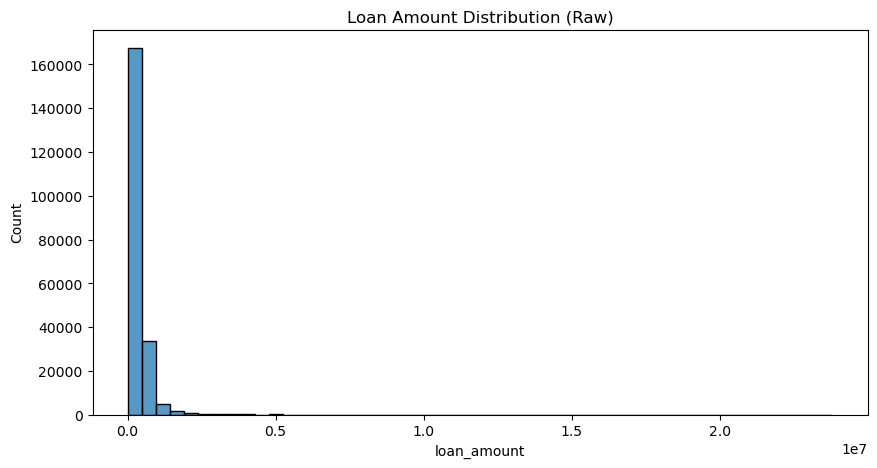

Loan Amount Quantiles:
0.01      15000.0
0.05      35000.0
0.25      95000.0
0.50     195000.0
0.75     405000.0
0.95     865000.0
0.99    1765000.0
Name: loan_amount, dtype: float64


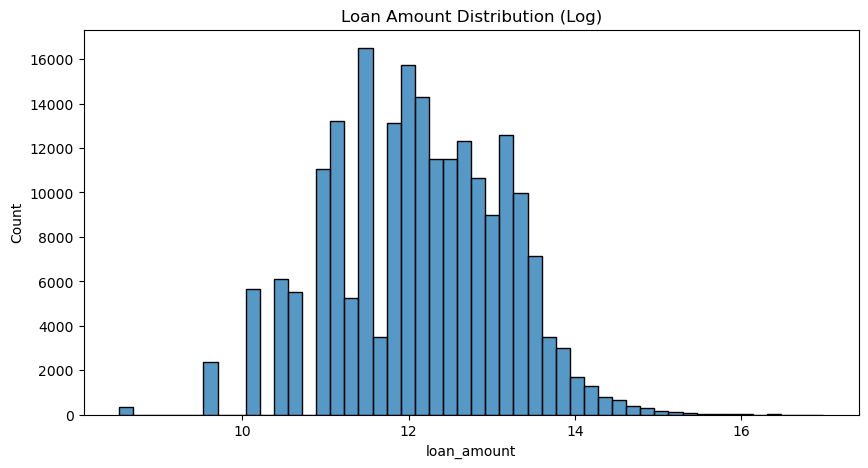

Log Loan Amount Quantiles:
0.01     9.615872
0.05    10.463132
0.25    11.461643
0.50    12.180760
0.75    12.911645
0.95    13.670486
0.99    14.383662
Name: loan_amount, dtype: float64


In [54]:
# Loan Amount Distribution (raw)

# convert loan_ammount to numeric
df["loan_amount"] = to_numeric_series(df["loan_amount"])

# drop missing values
loan_amt = df["loan_amount"].dropna()

# plot distribution
plt.figure(figsize = (10, 5))
sns.histplot(loan_amt, bins = 50)
plt.title("Loan Amount Distribution (Raw)")
plt.savefig("figures/loan_amount_distribution_raw.png", 
            dpi=300, 
            bbox_inches="tight")
plt.show()

print("Loan Amount Quantiles:")
print(loan_amt.quantile([0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]))


# Loan Amount Distribution (Log)
loan_amt_log = np.log1p(loan_amt)

plt.figure(figsize = (10, 5))
sns.histplot(loan_amt_log, bins = 50)
plt.title("Loan Amount Distribution (Log)")
plt.savefig("figures/loan_amount_distribution_log.png", 
            dpi=300, 
            bbox_inches="tight")
plt.show()

print("Log Loan Amount Quantiles:")
print(loan_amt_log.quantile([0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]))

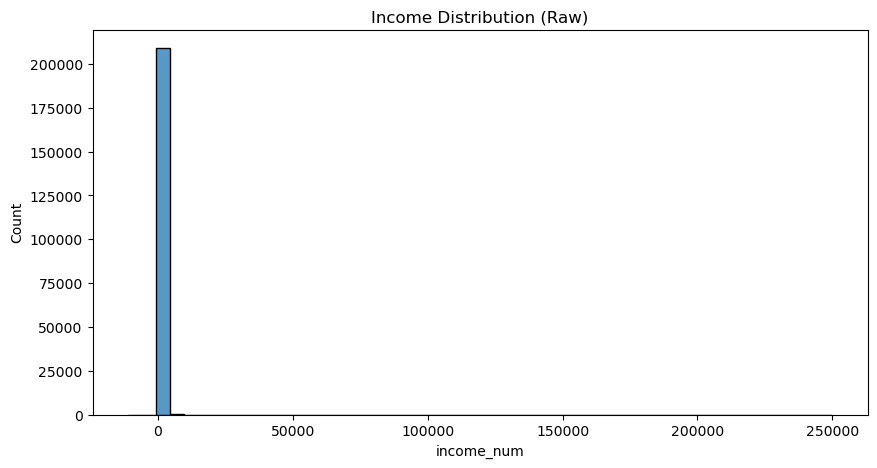

Income Quantiles:
0.01      14.0
0.05      39.0
0.25      76.0
0.50     121.0
0.75     190.0
0.95     464.0
0.99    1200.0
Name: income_num, dtype: float64


/Users/yolanda/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/yolanda/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


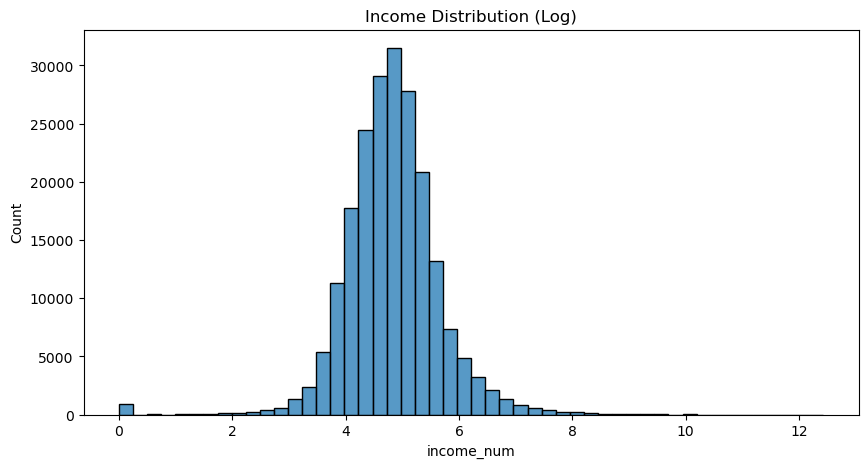

In [56]:
# Income Distribution (Raw)
df["income_num"] = to_numeric_series(df["income"])
income_num = df["income_num"].dropna()

plt.figure(figsize = (10, 5))
sns.histplot(income_num, bins = 50)
plt.title("Income Distribution (Raw)")
plt.savefig("figures/income_distribution_raw.png", 
            dpi=300, 
            bbox_inches="tight")
plt.show()

print("Income Quantiles:")
print(income_num.quantile([0.01, 0.05, 0.25, 0.50, 0.75, 0.95, 0.99]))

# Income Distribution (Log)
log_income = np.log1p(income_num)

plt.figure(figsize = (10, 5))
sns.histplot(log_income, bins = 50)
plt.title("Income Distribution (Log)")
plt.savefig("figures/income_distribution_log.png", 
            dpi=300, 
            bbox_inches="tight")
plt.show()


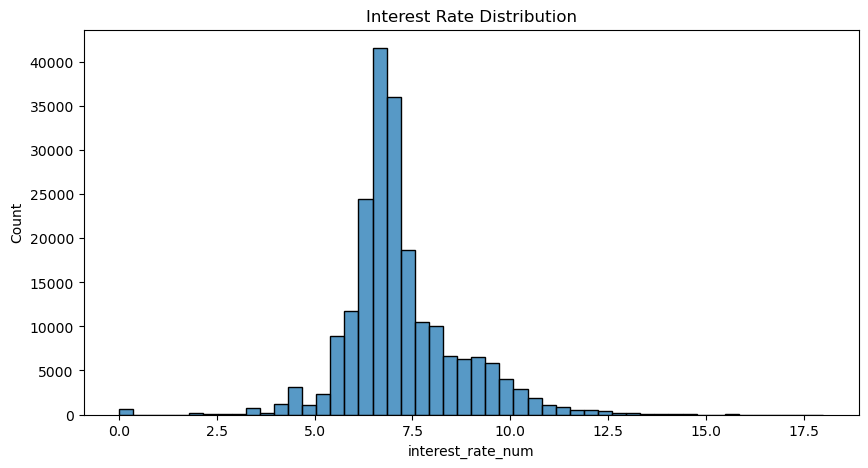

Interest Rate Quantiles:
0.01     3.990
0.05     5.500
0.25     6.375
0.50     6.880
0.75     7.750
0.95     9.900
0.99    11.500
Name: interest_rate_num, dtype: float64


In [57]:
# Interest Rate Distribution

df["interest_rate_num"] = to_numeric_series(df["interest_rate"])
interest_rate = df["interest_rate_num"].dropna()

plt.figure(figsize = (10, 5))
sns.histplot(interest_rate, bins = 50)
plt.title("Interest Rate Distribution")
plt.savefig("figures/interest_rate_distribution.png", 
            dpi=300, 
            bbox_inches="tight")
plt.show()

print("Interest Rate Quantiles:")
print(interest_rate.quantile([0.01, 0.05, 0.25, 0.50, 0.75, 0.95, 0.99]))


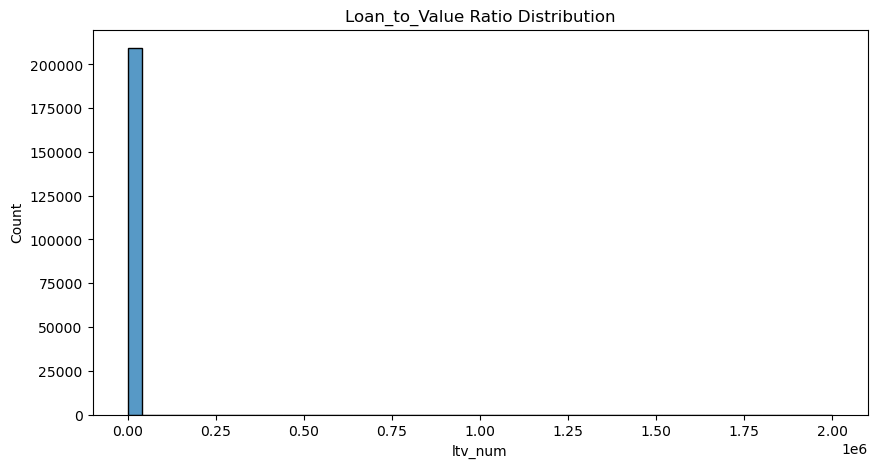

Loan-to-Value Ratio Quantiles:
0.01      9.05904
0.05     22.22000
0.25     55.47000
0.50     75.00000
0.75     85.00000
0.95     97.00000
0.99    113.72320
Name: ltv_num, dtype: float64


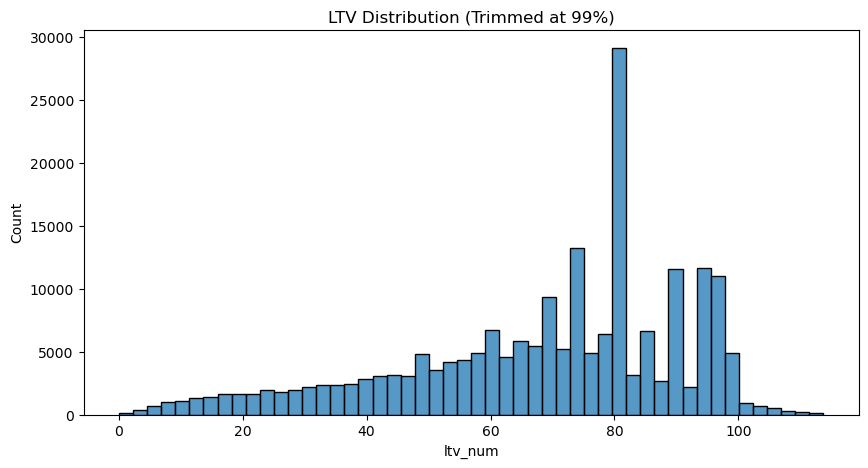

In [58]:
# Loan_to_Value Ratio

df["ltv_num"] = to_numeric_series(df["loan_to_value_ratio"])
ltv = df["ltv_num"].dropna()

plt.figure(figsize = (10, 5))
sns.histplot(ltv, bins = 50)
plt.title("Loan_to_Value Ratio Distribution")
plt.savefig("figures/ltv_distribution.png", 
            dpi=300, 
            bbox_inches="tight")
plt.show()

print("Loan-to-Value Ratio Quantiles:")
print(ltv.quantile([0.01, 0.05, 0.25, 0.50, 0.75, 0.95, 0.99]))

# Trim LTV at 99th percentile to reduce skewness and outliers
ltv_trim = ltv[ltv <= ltv.quantile(0.99)]

plt.figure(figsize=(10,5))
sns.histplot(ltv_trim, bins=50)
plt.title("LTV Distribution (Trimmed at 99%)")
plt.savefig("figures/ltv_distribution_trimmed.png", 
            dpi=300, 
            bbox_inches="tight")
plt.show()

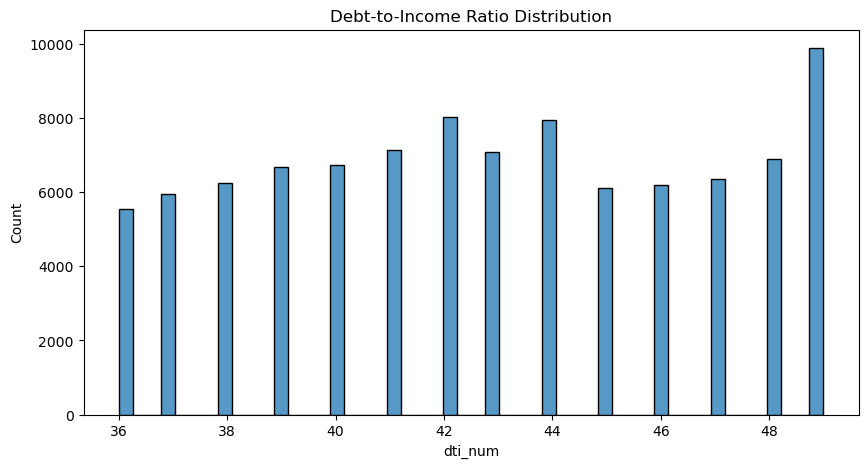

Debt-to-Income Ratio Quantiles:
0.01    36.0
0.05    36.0
0.25    39.0
0.50    43.0
0.75    46.0
0.95    49.0
0.99    49.0
Name: dti_num, dtype: float64


In [59]:
# Debt_to_Income Ratio (DTI)

df["dti_num"] = to_numeric_series(df["debt_to_income_ratio"])
dti = df["dti_num"].dropna()

plt.figure(figsize = (10, 5))
sns.histplot(dti, bins = 50)
plt.title("Debt-to-Income Ratio Distribution")
plt.savefig("figures/dti_distribution.png", 
            dpi=300, 
            bbox_inches="tight")
plt.show()

print("Debt-to-Income Ratio Quantiles:")
print(dti.quantile([0.01, 0.05, 0.25, 0.50, 0.75, 0.95, 0.99]))


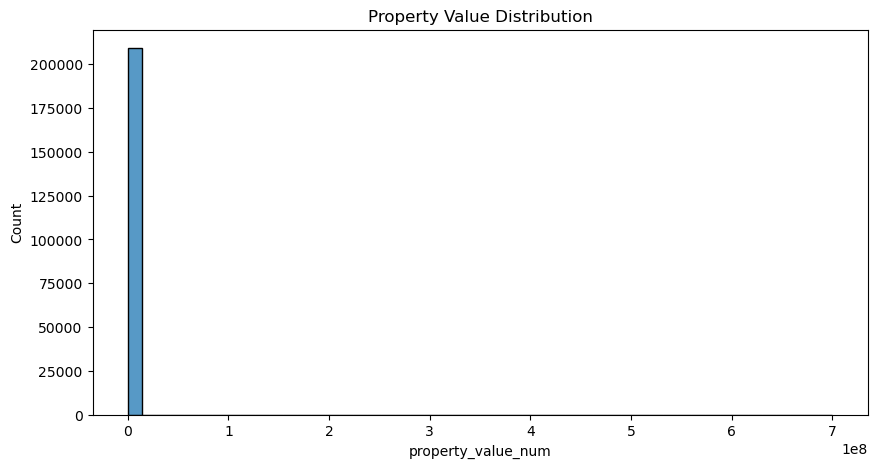

Property Value Quantiles:
0.01      75000.0
0.05     135000.0
0.25     255000.0
0.50     465000.0
0.75     745000.0
0.95    1605000.0
0.99    3305000.0
Name: property_value_num, dtype: float64


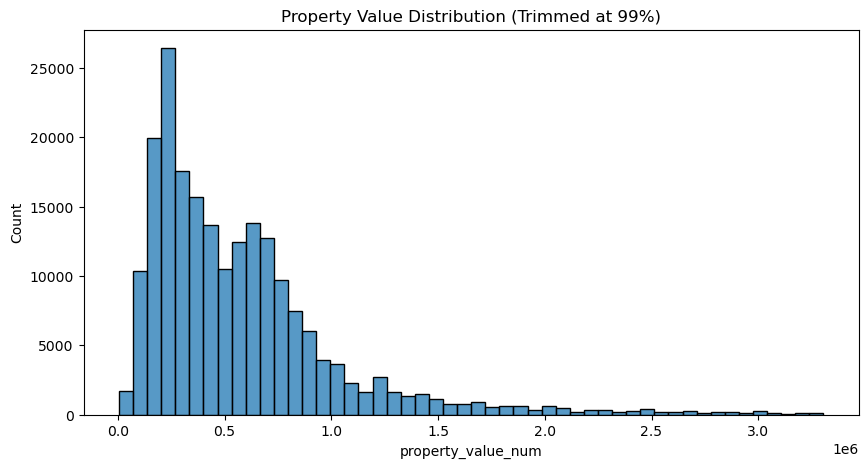

In [60]:
# Property Value

df["property_value_num"] = to_numeric_series(df["property_value"])
property_value_num = df["property_value_num"].dropna()
plt.figure(figsize = (10, 5))
sns.histplot(property_value_num, bins = 50)
plt.title("Property Value Distribution")
plt.savefig("figures/property_value_distribution.png", 
            dpi=300, 
            bbox_inches="tight")
plt.show()

print("Property Value Quantiles:")
print(property_value_num.quantile([0.01, 0.05, 0.25, 0.50, 0.75, 0.95, 0.99]))

#Trim at 99th percentile to reduce skewness and outlier impact
pv_trim = property_value_num[property_value_num <= property_value_num.quantile(0.99)]

plt.figure(figsize=(10,5))
sns.histplot(pv_trim, bins=50)
plt.title("Property Value Distribution (Trimmed at 99%)")
plt.savefig("figures/property_value_distribution_trimmed.png", 
            dpi=300, 
            bbox_inches="tight")
plt.show()



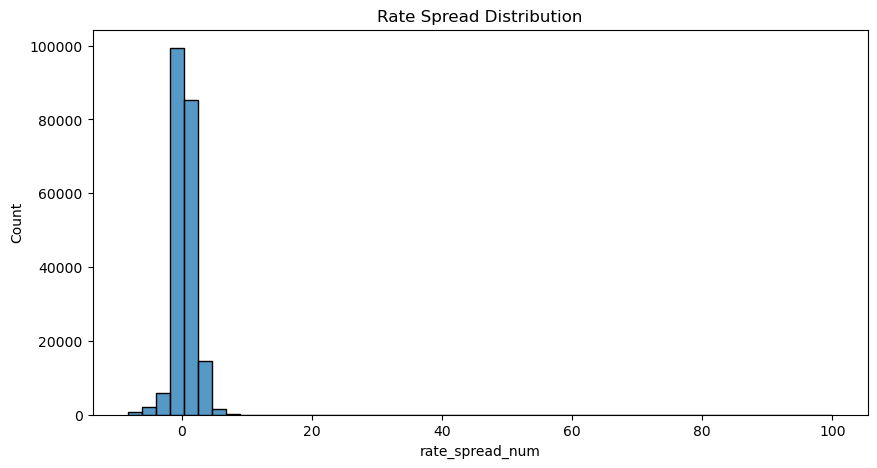

Rate Spread Quantiles:
0.01   -4.19000
0.05   -1.31650
0.25   -0.09600
0.50    0.32000
0.75    1.03272
0.95    3.02000
0.99    4.54000
Name: rate_spread_num, dtype: float64


In [61]:
# Rate Spread

df["rate_spread_num"] = to_numeric_series(df["rate_spread"])
rate_spread = df["rate_spread_num"].dropna()
plt.figure(figsize = (10, 5))
sns.histplot(rate_spread, bins = 50)
plt.title("Rate Spread Distribution")
plt.savefig("figures/rate_spread_distribution.png", 
            dpi=300, 
            bbox_inches="tight")
plt.show()

print("Rate Spread Quantiles:")
print(rate_spread.quantile([0.01, 0.05, 0.25, 0.50, 0.75, 0.95, 0.99]))


In [62]:
# Approval Analysis
if "action_taken" in df.columns:
    print(df["action_taken"].value_counts(dropna=False))

# Approval rate
action_counts = df["action_taken"].value_counts()
action_pct = df["action_taken"].value_counts(normalize = True)
print("\nApproval Rate (%):")
print(action_pct)

# Filter Main Outcomes
main_df = df[df["action_taken"].isin([
    "Loan_originated",
    "Application_denied"
])].copy()
print("\nMain Outcomes:")
print(main_df["action_taken"].value_counts())

# Create binary target variable
main_df["approved"] = np.where(
    main_df["action_taken"] == "Loan_originated", 1, 0
)
print("\nBinary variable:")
print(main_df["approved"].value_counts())

Loan_originated       156349
Application_denied     53020
Name: action_taken, dtype: int64

Approval Rate (%):
Loan_originated       0.746763
Application_denied    0.253237
Name: action_taken, dtype: float64

Main Outcomes:
Loan_originated       156349
Application_denied     53020
Name: action_taken, dtype: int64

Binary variable:
1    156349
0     53020
Name: approved, dtype: int64


In [63]:
# Create Log Variables for Main Outcomes
if "loan_amount" in main_df.columns:
    main_df["log_loan_amount"] = np.log1p(main_df["loan_amount"])

if "income_num" in main_df.columns:
    main_df["log_income"] = np.log1p(main_df["income_num"])

if "property_value_num" in main_df.columns:
    main_df["log_property_value"] = np.log1p(main_df["property_value_num"])


/Users/yolanda/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/yolanda/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


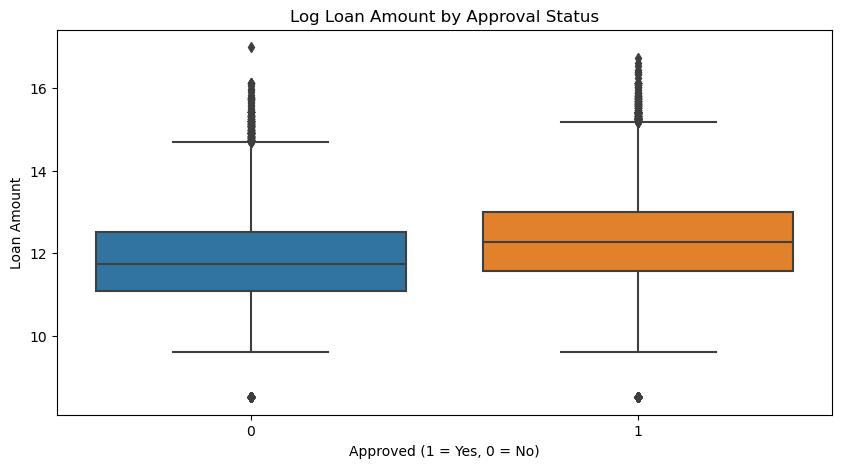

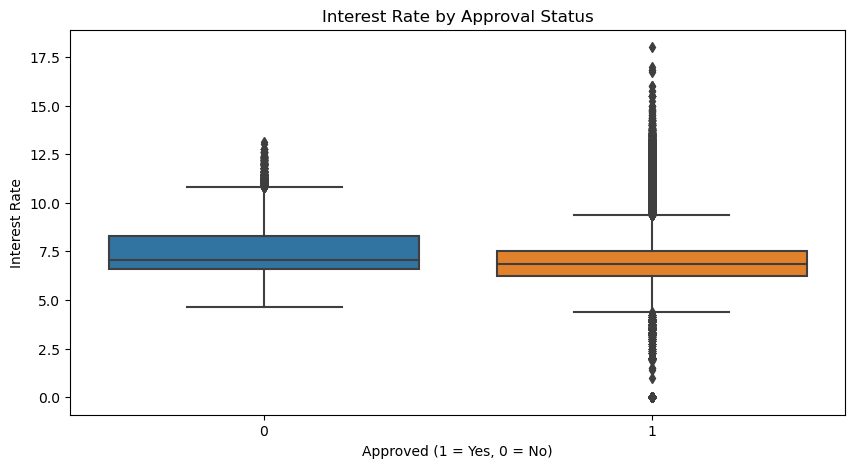

In [64]:
# Compare Log Loan Amount by Approval Status
plt.figure(figsize = (10, 5))
sns.boxplot(data = main_df, x = "approved", y = "log_loan_amount")
plt.title("Log Loan Amount by Approval Status")
plt.xlabel("Approved (1 = Yes, 0 = No)")
plt.ylabel("Loan Amount")
plt.savefig("figures/log_loan_amount_by_approval_status.png", 
            dpi=300, 
            bbox_inches="tight")
plt.show()

# Compare Interest Rate by Approval Status
plt.figure(figsize = (10, 5))
sns.boxplot(data = main_df, x = "approved", y = "interest_rate_num")
plt.title("Interest Rate by Approval Status")
plt.xlabel("Approved (1 = Yes, 0 = No)")
plt.ylabel("Interest Rate")
plt.savefig("figures/interest_rate_by_approval_status.png", 
            dpi=300, 
            bbox_inches="tight")
plt.show()

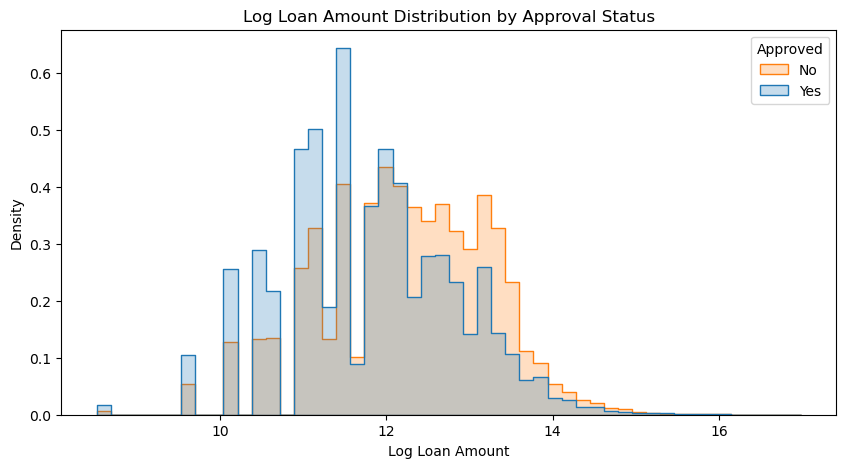

In [65]:
# Overlay Distribution

plt.figure(figsize = (10, 5))
sns.histplot(
    data = main_df,
    x = "log_loan_amount",
    hue = "approved",
    bins = 50,
    element = "step",
    stat = "density",
    common_norm = False
)
plt.title("Log Loan Amount Distribution by Approval Status")
plt.xlabel("Log Loan Amount")
plt.ylabel("Density")
plt.legend(title = "Approved", labels = ["No", "Yes"])
plt.savefig("figures/overlay_log_loan_amount_distribution.png",
            dpi=300, 
            bbox_inches="tight")
plt.show()

In [66]:
# Demographic Group Analysis
demo_candidates = [
    "derived_race",
    "derived_ethnicity",
    "derived_sex",
    "applicant_age",
    "age"
]

demo_existing = [c for c in demo_candidates if c in main_df.columns]
print("Demographic variables available for analysis:", demo_existing)

Demographic variables available for analysis: ['derived_race', 'derived_ethnicity', 'derived_sex', 'applicant_age']


,n,approval_rate
derived_race,,
White,161135,0.767890
Asian,21322,0.741488
Black_or_African_American,20052,0.596300
Joint,4556,0.806629
American_Indian_or_Alaska_Native,1027,0.509250
2_or_more_minority_races,614,0.534202
Native_Hawaiian_or_Other_Pacific_Islander,551,0.513612
Free_Form_Text_Only,112,0.348214


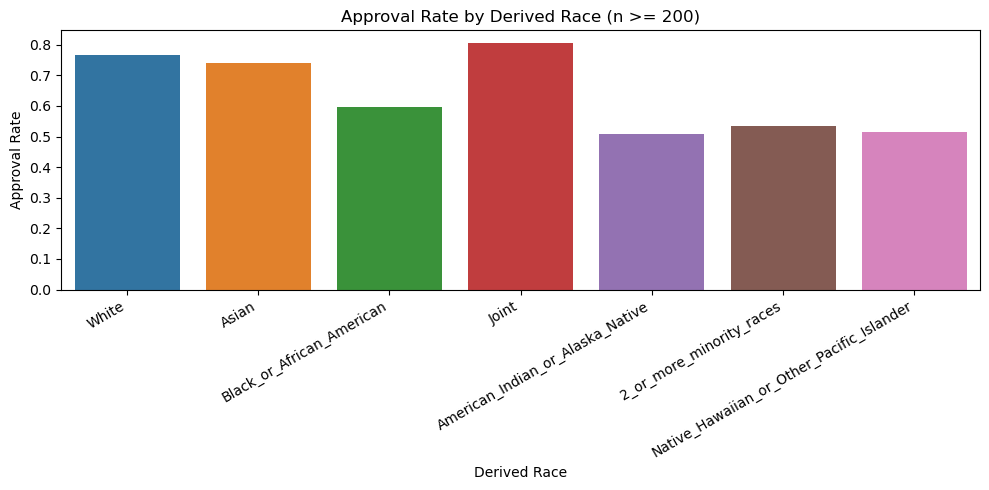

In [67]:
# Approval rate by Derived Race
if "derived_race" in main_df.columns:
    race_summary = (
        main_df.groupby("derived_race")["approved"]
        .agg(n = "count", approval_rate = "mean")
        .sort_values("n", ascending = False)
    )
    display(race_summary)

    race_summary_plot = race_summary[race_summary["n"] >= 200] # threshold to avoid tiny groups
    plt.figure(figsize = (10, 5))
    sns.barplot(
        x = race_summary_plot.index,
        y = race_summary_plot["approval_rate"]
    )
    plt.title("Approval Rate by Derived Race (n >= 200)")
    plt.xlabel("Derived Race")
    plt.ylabel("Approval Rate")
    plt.xticks(rotation = 30, ha = "right")
    plt.tight_layout()
    plt.savefig("figures/approval_rate_by_derived_race.png",
                dpi=300, 
                bbox_inches="tight")
    plt.show()
else:
    print("Derived race variable not found in dataset.")

,n,approval_rate
derived_ethnicity,,
Not_Hispanic_or_Latino,186000,0.755548
Hispanic_or_Latino,17831,0.653861
Joint,5389,0.763593
Free_Form_Text_Only,149,0.288591


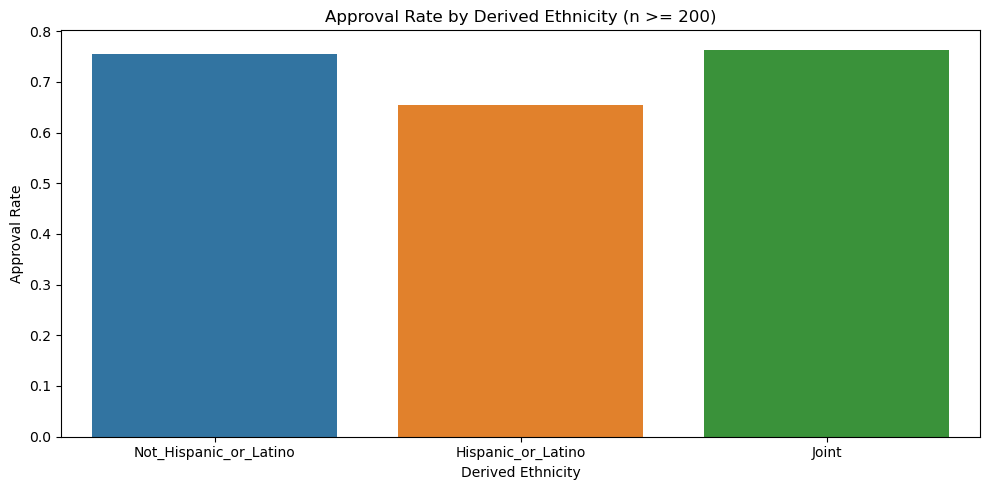

In [68]:
# Approval rate by Derived Ethnicity
if "derived_ethnicity" in main_df.columns:
    eth_summary = (
        main_df.groupby("derived_ethnicity")["approved"]
        .agg(n = "count", approval_rate = "mean")
        .sort_values("n", ascending = False)
    )
    display(eth_summary)
    
    eth_plot = eth_summary[eth_summary["n"] >= 200]
    plt.figure(figsize = (10, 5))
    sns.barplot(
        x = eth_plot.index,
        y = eth_plot["approval_rate"]
    )
    plt.title("Approval Rate by Derived Ethnicity (n >= 200)")
    plt.xlabel("Derived Ethnicity")
    plt.ylabel("Approval Rate")
    plt.tight_layout()
    plt.savefig("figures/approval_rate_by_derived_ethnicity.png",
                dpi=300, 
                bbox_inches="tight")
    plt.show()
else:
    print("Derived ethnicity column not found in main_df")

,n,approval_rate
derived_sex,,
Male,77890,0.709693
Joint,77613,0.814541
Female,53866,0.702707


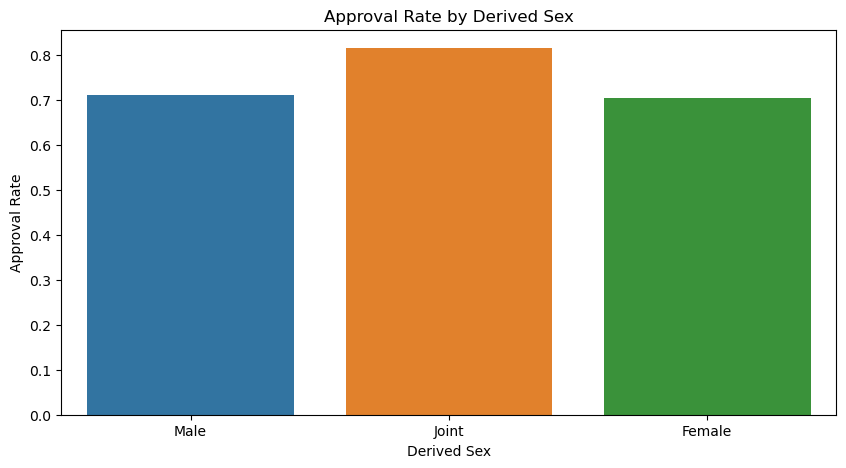

In [69]:
# Approval rate by Derived Sex
if "derived_sex" in main_df.columns:
    sex_summary = (
        main_df.groupby("derived_sex")["approved"]
        .agg(n = "count", approval_rate = "mean")
        .sort_values("n", ascending = False)
    )
    display(sex_summary)

    plt.figure(figsize = (10, 5))
    sns.barplot(x = sex_summary.index, y = sex_summary["approval_rate"])
    plt.title("Approval Rate by Derived Sex")
    plt.xlabel("Derived Sex")
    plt.ylabel("Approval Rate")
    plt.savefig("figures/approval_rate_by_derived_sex.png",
                dpi=300, 
                bbox_inches="tight")
    plt.show()
else:
    print("Derived sex column not found in main_df")

,n,approval_rate
applicant_age,,
35-44,52797,0.768604
45-54,44752,0.720080
25-34,42743,0.828837
55-64,36542,0.692080
65-74,19896,0.690692
above_74,7297,0.649308
below_25,5342,0.813740


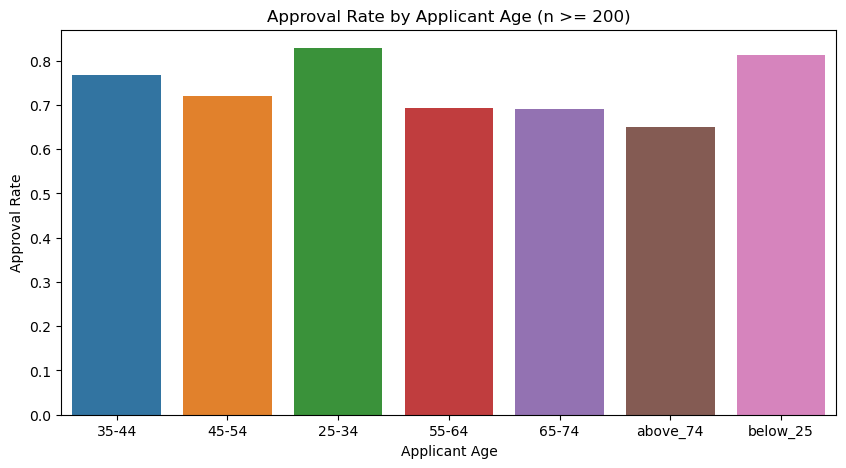

In [70]:
# Approval rate by Derived Age
if "applicant_age" in main_df.columns:
    age_summary = (
        main_df.groupby("applicant_age")["approved"]
        .agg(n = "count", approval_rate = "mean")
        .sort_values("n", ascending = False)
    )
    display(age_summary)

    age_plot = age_summary[age_summary["n"] >= 200]
    plt.figure(figsize = (10, 5))
    sns.barplot(x = age_plot.index, y = age_plot["approval_rate"])
    plt.title("Approval Rate by Applicant Age (n >= 200)")
    plt.xlabel("Applicant Age")
    plt.ylabel("Approval Rate")
    plt.savefig("figures/approval_rate_by_applicant_age.png",
                dpi=300, 
                bbox_inches="tight")
    plt.show()

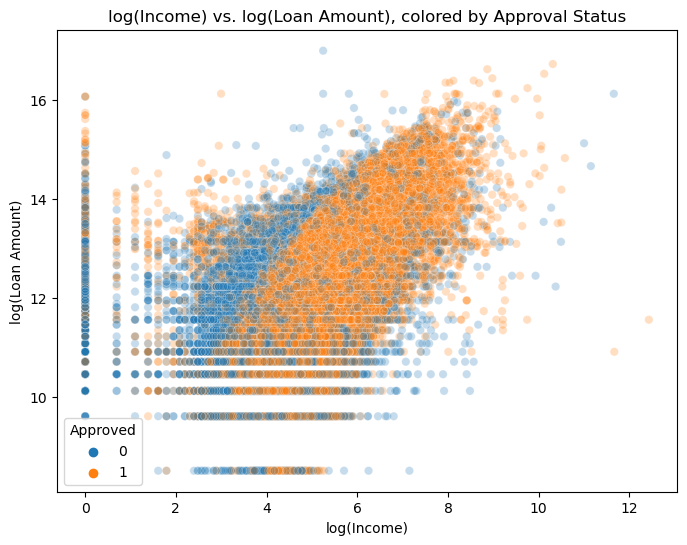

In [71]:
# Financial Relationship Analysis

# log_Loan Amount vs. Log_Income
needed = ["log_income", "log_loan_amount"]

plot_df = main_df[needed + ["approved"]].dropna()
plt.figure(figsize = (8, 6))
sns.scatterplot(data = plot_df, x = "log_income", y = "log_loan_amount", hue = "approved", alpha = 0.25)
plt.title("log(Income) vs. log(Loan Amount), colored by Approval Status")
plt.xlabel("log(Income)")
plt.ylabel("log(Loan Amount)")
plt.legend(title = "Approved")
plt.savefig("figures/log_income_vs_log_loan_amount.png",
            dpi=300, 
            bbox_inches="tight")
plt.show()


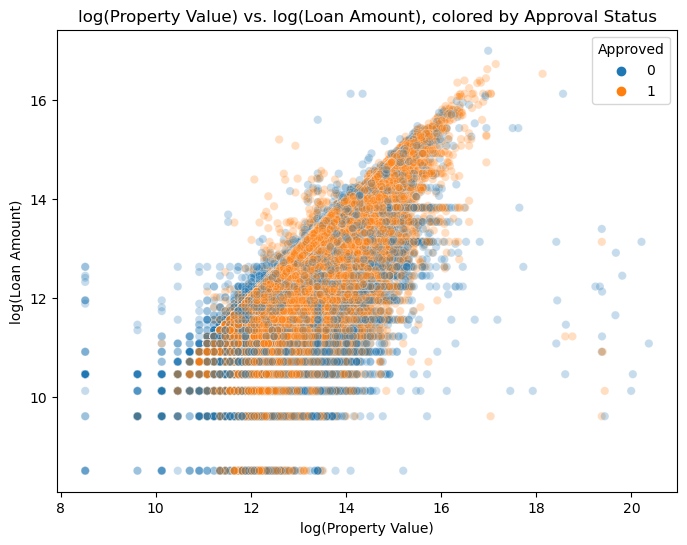

In [72]:
# log property value vs. log loan amount
needed = ["log_property_value", "log_loan_amount"]

plot_df = main_df[needed + ["approved"]].dropna()
plt.figure(figsize = (8, 6))
sns.scatterplot(data = plot_df, x = "log_property_value", y = "log_loan_amount", hue = "approved", alpha = 0.25)
plt.title("log(Property Value) vs. log(Loan Amount), colored by Approval Status")
plt.xlabel("log(Property Value)")
plt.ylabel("log(Loan Amount)")
plt.legend(title = "Approved")
plt.savefig("figures/log_property_value_vs_log_loan_amount.png",
            dpi=300, 
            bbox_inches="tight")
plt.show()

In [82]:
# Summary table: means and quantiles by approval
financial_cols = [
    "loan_amount_num",
    "income_num",
    "property_value_num",
    "interest_rate_num",
    "ltv_num",
    "dti_num",
    "rate_spread_num"
]
financial_cols = [c for c in financial_cols if c in main_df.columns]

summary = main_df.groupby("approved")[financial_cols].agg(["mean", "median"])
summary.columns = [f"{var}_{stat}" for (var, stat) in summary.columns]
summary = summary.round(2)

# Table 1: Income & Property
table1_cols = [
    "income_num_mean", "income_num_median",
    "property_value_num_mean", "property_value_num_median",
]
table1_cols = [c for c in table1_cols if c in summary.columns]
table1 = summary[table1_cols].copy()

print("\n=== Table 1: Income & Property Characteristics (by approved) ===\n")
print(table1.to_markdown())

# Table 2: Interest Rate & LTV
table2_cols = [
    "interest_rate_num_mean", "interest_rate_num_median",
    "ltv_num_mean", "ltv_num_median",
]
table2_cols = [c for c in table2_cols if c in summary.columns]
table2 = summary[table2_cols].copy()

print("\n=== Table 2: Interest Rate & LTV (by approved) ===\n")
print(table2.to_markdown())

# Table 3: Risk Metrics (DTI & Rate Spread)
table3_cols = [
    "dti_num_mean", "dti_num_median",
    "rate_spread_num_mean", "rate_spread_num_median",
]
table3_cols = [c for c in table3_cols if c in summary.columns]
table3 = summary[table3_cols].copy()

print("\n=== Table 3: Risk Metrics (DTI & Rate Spread) (by approved) ===\n")
print(table3.to_markdown())


=== Table 1: Income & Property Characteristics (by approved) ===

|   approved |   income_num_mean |   income_num_median |   property_value_num_mean |   property_value_num_median |
|-----------:|------------------:|--------------------:|--------------------------:|----------------------------:|
|          0 |            153.52 |                  96 |                    774339 |                      525000 |
|          1 |            197.88 |                 130 |                    620680 |                      455000 |

=== Table 2: Interest Rate & LTV (by approved) ===

|   approved |   interest_rate_num_mean |   interest_rate_num_median |   ltv_num_mean |   ltv_num_median |
|-----------:|-------------------------:|---------------------------:|---------------:|-----------------:|
|          0 |                     7.52 |                       7.08 |         127.74 |            71.17 |
|          1 |                     7.06 |                       6.88 |          70.03 |            

Correlation variables used: ['log_loan_amount', 'log_income', 'log_property_value', 'interest_rate_num', 'ltv_num', 'dti_num', 'rate_spread_num', 'approved']
Correlation df shape: (96705, 8)


,log_loan_amount,log_income,log_property_value,interest_rate_num,ltv_num,dti_num,rate_spread_num,approved
log_loan_amount,1.000000,0.556558,0.629097,-0.230739,-0.003604,0.086131,-0.164567,0.154109
log_income,0.556558,1.000000,0.702393,0.026487,-0.004190,-0.087175,-0.044599,0.034831
log_property_value,0.629097,0.702393,1.000000,-0.016105,-0.021733,0.072096,-0.121811,0.045640
interest_rate_num,-0.230739,0.026487,-0.016105,1.000000,0.005491,0.002491,0.776325,-0.107904
ltv_num,-0.003604,-0.004190,-0.021733,0.005491,1.000000,-0.005292,0.008021,-0.007833
dti_num,0.086131,-0.087175,0.072096,0.002491,-0.005292,1.000000,0.011774,-0.012137
rate_spread_num,-0.164567,-0.044599,-0.121811,0.776325,0.008021,0.011774,1.000000,-0.074103
approved,0.154109,0.034831,0.045640,-0.107904,-0.007833,-0.012137,-0.074103,1.000000


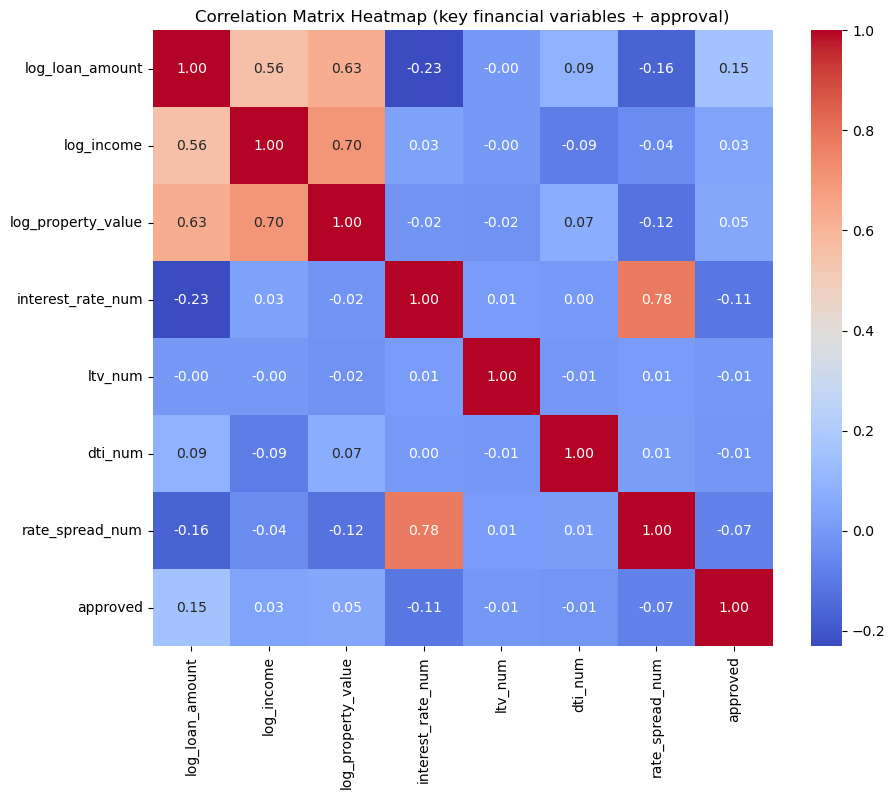

In [77]:
# Correlation Matrix
# select reasonable subset of numeric variables for correlation analysis
corr_vars = [
    "log_loan_amount",
    "log_income",
    "log_property_value",
    "interest_rate_num",
    "ltv_num",
    "dti_num",
    "rate_spread_num",
    "approved"
    #include approval to see linear relationships directly
]
corr_vars = [c for c in corr_vars if c in main_df.columns]
print("Correlation variables used:", corr_vars)
corr_df = main_df[corr_vars].dropna()
print("Correlation df shape:", corr_df.shape)

#correlation table
corr_matrix = corr_df.corr(numeric_only=True)
display(corr_matrix)

#correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot = True, fmt = ".2f", cmap = "coolwarm")
plt.title("Correlation Matrix Heatmap (key financial variables + approval)")
plt.savefig("figures/heatmap.png", bbox_inches='tight')
plt.show()

## Part 3: Data Preprocessing and Feature Engineering

In [33]:
from sklearn.impute import KNNImputer

cols = ['loan_to_value_ratio','interest_rate','rate_spread','property_value']

missing_mask = df[cols].isna().any(axis=1)

imputer = KNNImputer(n_neighbors=5)

df.loc[missing_mask, cols] = imputer.fit_transform(df.loc[missing_mask, cols]).round(2)

mode_value = df['loan_term'].mode()[0]
df['loan_term'] = df['loan_term'].fillna(mode_value)



In [34]:

df = df[df['action_taken'].isin([
    'Loan_originated',
    'Application_denied'
])]

df['approved'] = (df['action_taken'] == 'Loan_originated').astype(int)
df['approved'].value_counts()



1    156349
0     53020
Name: approved, dtype: int64

In [35]:
import numpy as np
import pandas as pd

df['income'] = pd.to_numeric(df['income'], errors='coerce')
df['property_value'] = pd.to_numeric(df['property_value'], errors='coerce')

df['income_log'] = np.log1p(df['income'])
df['property_value_log'] = np.log1p(df['property_value'])
df['income_log'] = np.log1p(df['income'])

/Users/yolanda/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/yolanda/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/yolanda/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/yolanda/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [36]:
df = pd.get_dummies(
    df,
    columns=['loan_type'],
    drop_first=True
)


In [37]:
age_dummies = pd.get_dummies(
    df['co-applicant_age'],
    prefix='co_age',
    drop_first=True
)

df = pd.concat([df, age_dummies], axis=1)

age_dummies = pd.get_dummies(
    df['applicant_age'],
    prefix='app_age',
    drop_first=True
)

df = pd.concat([df, age_dummies], axis=1)



In [38]:
df['co-applicant_race_observed'] = (
    df['co-applicant_race_observed']
    .replace('nan', np.nan)
)
df['co_applicant'] = (
    df['co-applicant_race_observed']
    .ne('no_co-applicant')
    .astype(int)
)


In [39]:
numeric_mask = df['debt_to_income_ratio'].str.match(r'^\d+(\.\d+)?$')

df_numeric = df[numeric_mask].copy()

df_numeric['dti_numeric'] = df_numeric['debt_to_income_ratio'].astype(float)

df_numeric['dti_group'] = pd.cut(
    df_numeric['dti_numeric'],
    bins=[0, 20, 30, 36, 43, 50, 100],
    labels=['<20', '20-30', '30-36', '36-43', '43-50', '50+']
)
dti_dummies = pd.get_dummies(
    df_numeric['dti_group'],
    prefix='dti',
    drop_first=True
)

df_numeric = pd.concat([df_numeric, dti_dummies], axis=1)



In [40]:
for col in df.select_dtypes(include='bool').columns:
    df[col] = df[col].astype(int)
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)


In [41]:
df = df.drop(columns=[
    'co_age_9999',
    'applicant_age_above_62',
    'co-applicant_age_above_62'
])

In [42]:
for c in ['loan_amount', 'interest_rate', 'loan_term', 'income', 'property_value', 'loan_to_value_ratio']:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')

if 'loan_amount' in df.columns and 'income' in df.columns:
    df['loan_to_income'] = df['loan_amount'] / (df['income'] + 1e-9)

if 'property_value' in df.columns and 'loan_amount' in df.columns:
    df['equity'] = df['property_value'] - df['loan_amount']
    df['equity_ratio'] = 1 - (df['loan_amount'] / (df['property_value'] + 1e-9))



In [43]:
def monthly_payment(P, annual_rate_pct, n_months):
    r = (annual_rate_pct / 100.0) / 12.0
    n = n_months
    return np.where(
        (P > 0) & (n > 0) & (r > 0),
        P * r * (1 + r)**n / ((1 + r)**n - 1),
        np.where((P > 0) & (n > 0) & (r == 0), P / n, np.nan)
    )
needed = {'loan_amount', 'interest_rate', 'loan_term', 'income'}
if needed.issubset(df.columns):
    df['monthly_payment_est'] = monthly_payment(
        df['loan_amount'].values,
        df['interest_rate'].values,
        df['loan_term'].values
    )
    df['pti'] = 12 * df['monthly_payment_est'] / (df['income'] + 1e-9)


/var/folders/dj/dfxdyqn16x74lz31ksdm1w2m0000gn/T/ipykernel_41801/2787598137.py:6: RuntimeWarning: invalid value encountered in divide
  P * r * (1 + r)**n / ((1 + r)**n - 1),


In [44]:
group_col = 'county_code'
for c in ['interest_rate','property_value','income']:
    if group_col in df.columns and c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')
        grp_median = df.groupby(group_col)[c].transform('median')
        df[c + '_minus_county_median'] = df[c] - grp_median

In [45]:
from sklearn.preprocessing import StandardScaler

df_scaled = df.copy()

num_cols = df_scaled.select_dtypes(include=[np.number]).columns.tolist()

exclude = []
for c in num_cols:
    unique_vals = df_scaled[c].dropna().unique()
    if len(unique_vals) <= 2 and set(unique_vals).issubset({0, 1}):
        exclude.append(c)
    if c.endswith('_missing') or c.endswith('_flag') or c.startswith('has_'):
        exclude.append(c)

exclude = list(set(exclude))
scale_cols = [c for c in num_cols if c not in exclude]

scaler = StandardScaler()
X = df_scaled[scale_cols].replace([np.inf, -np.inf], np.nan)

X_filled = X.fillna(X.median(numeric_only=True))
Z = scaler.fit_transform(X_filled)
z_cols = [c + "_z" for c in scale_cols]  
df_scaled[z_cols] = pd.DataFrame(Z, columns=z_cols, index=df_scaled.index)
df = df_scaled.copy()

print("Added standardized columns:", len(z_cols))
print("Excluded (not standardized) count:", len(exclude))
print("Example added cols:", z_cols[:10])



Added standardized columns: 16
Excluded (not standardized) count: 100
Example added cols: ['loan_amount_z', 'loan_to_value_ratio_z', 'interest_rate_z', 'loan_term_z', 'property_value_z', 'income_z', 'income_log_z', 'property_value_log_z', 'loan_to_income_z', 'equity_z']


In [46]:
df.to_csv('1.csv', index=False)